In [1]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Settings
plt.style.use("ggplot")
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("HHS_Unaccompanied_Alien_Children_Program.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

df.head()

,Date,Children apprehended and placed in CBP custody,Children in CBP custody,Children transferred out of CBP custody,Children in HHS Care,Children discharged from HHS Care
719,2023-01-12,33.0,53.0,34.0,"6,566",436.0
718,2023-01-22,32.0,49.0,39.0,"7,122",227.0
717,2023-01-23,32.0,50.0,39.0,"7,280",181.0
716,2023-01-24,47.0,42.0,47.0,"7,433",175.0
715,2023-01-25,20.0,22.0,41.0,"7,538",180.0


In [3]:
df = df.dropna(how='all')
df['Children in HHS Care'] = df['Children in HHS Care'].str.replace(',', '', regex=False).astype(float)


print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

df.head()

Shape: (720, 6)

Missing Values:
 Date                                              0
Children apprehended and placed in CBP custody    0
Children in CBP custody                           0
Children transferred out of CBP custody           0
Children in HHS Care                              0
Children discharged from HHS Care                 0
dtype: int64

Summary Statistics:
                                 Date  \
count                            720   
mean   2024-07-06 05:29:59.999999744   
min              2023-01-12 00:00:00   
25%              2023-10-16 18:00:00   
50%              2024-07-05 12:00:00   
75%              2025-03-25 06:00:00   
max              2025-12-21 00:00:00   
std                              NaN   

       Children apprehended and placed in CBP custody  \
count                                      720.000000   
mean                                        93.523611   
min                                          0.000000   
25%                           

,Date,Children apprehended and placed in CBP custody,Children in CBP custody,Children transferred out of CBP custody,Children in HHS Care,Children discharged from HHS Care
719,2023-01-12,33.0,53.0,34.0,6566.0,436.0
718,2023-01-22,32.0,49.0,39.0,7122.0,227.0
717,2023-01-23,32.0,50.0,39.0,7280.0,181.0
716,2023-01-24,47.0,42.0,47.0,7433.0,175.0
715,2023-01-25,20.0,22.0,41.0,7538.0,180.0


In [4]:
df["Transfer Efficiency Ratio"] = (
    df["Children transferred out of CBP custody"] /
    (df["Children in CBP custody"] + df["Children transferred out of CBP custody"])
)

In [5]:
df["Discharge Effectiveness Index"] = (
    df["Children discharged from HHS Care"] /
    df["Children in HHS Care"]
)

In [6]:
df["Pipeline Throughput"] = (
    df["Children discharged from HHS Care"] /
    df["Children apprehended and placed in CBP custody"]
)

In [7]:
df["Backlog Change"] = (
    df["Children apprehended and placed in CBP custody"] -
    df["Children discharged from HHS Care"]
)

df["Cumulative Backlog"] = df["Backlog Change"].cumsum()

In [8]:
df["Outcome Stability Score"] = (
    df["Discharge Effectiveness Index"]
    .rolling(window=7)
    .std()
)

# Visualization

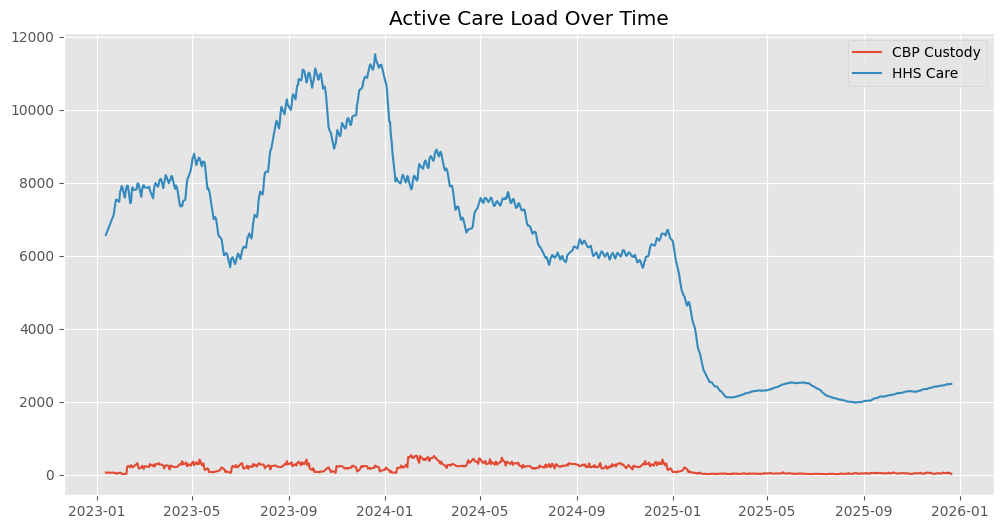

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Children in CBP custody"], label="CBP Custody")
plt.plot(df["Date"], df["Children in HHS Care"], label="HHS Care")
plt.legend()
plt.title("Active Care Load Over Time")
plt.show()

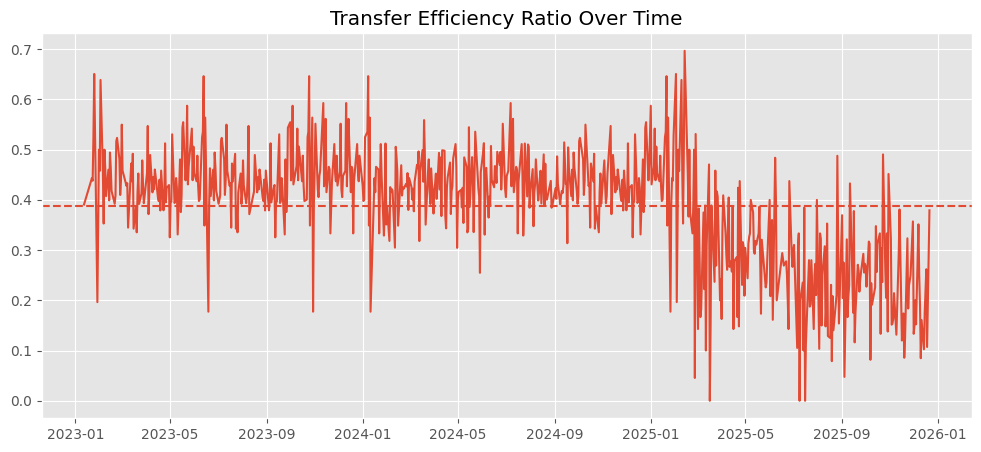

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Transfer Efficiency Ratio"])
plt.title("Transfer Efficiency Ratio Over Time")
plt.axhline(df["Transfer Efficiency Ratio"].mean(), linestyle="--")
plt.show()

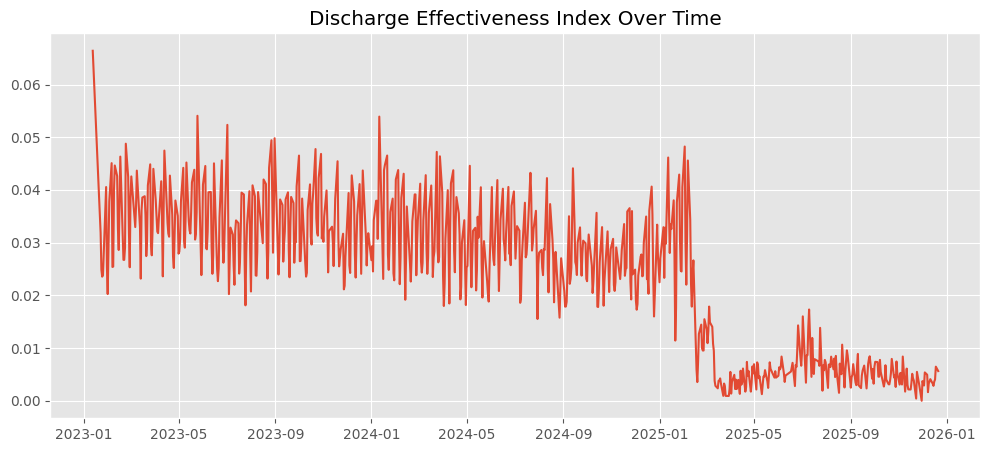

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Discharge Effectiveness Index"])
plt.title("Discharge Effectiveness Index Over Time")
plt.show()

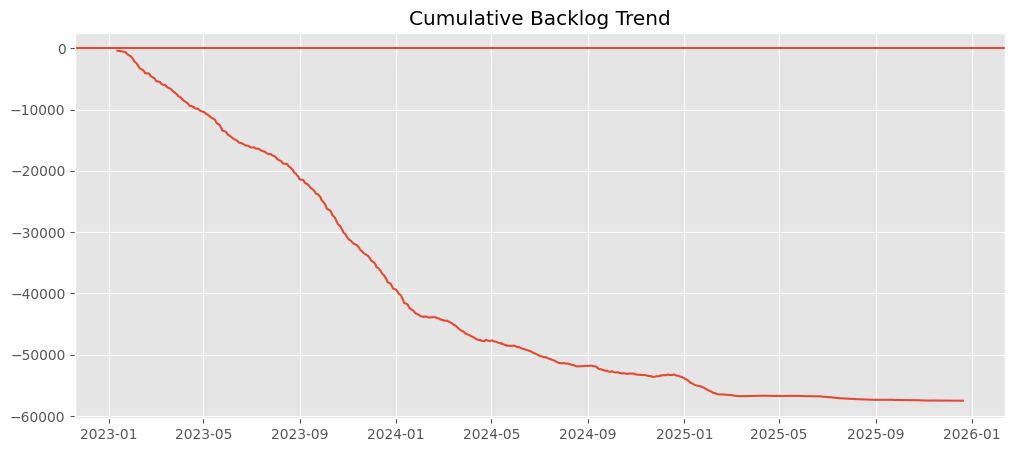

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Cumulative Backlog"])
plt.title("Cumulative Backlog Trend")
plt.axhline(0)
plt.show()

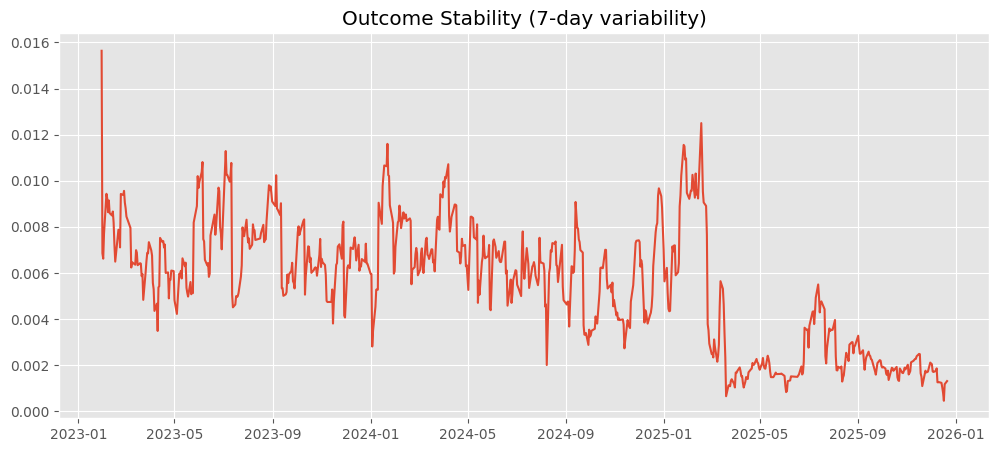

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Outcome Stability Score"])
plt.title("Outcome Stability (7-day variability)")
plt.show()

In [14]:
kpi_summary = {
    "Avg Transfer Efficiency": df["Transfer Efficiency Ratio"].mean(),
    "Avg Discharge Effectiveness": df["Discharge Effectiveness Index"].mean(),
    "Avg Pipeline Throughput": df["Pipeline Throughput"].mean(),
    "Total Backlog Change": df["Cumulative Backlog"].iloc[-1]
}

kpi_summary


{'Avg Transfer Efficiency': np.float64(0.38834418034937884),
 'Avg Discharge Effectiveness': np.float64(0.023737002796523007),
 'Avg Pipeline Throughput': np.float64(inf),
 'Total Backlog Change': np.float64(-57516.0)}

# Bottleneck Detection

In [15]:
df["Bottleneck Flag"] = np.where(
    df["Backlog Change"] > 0, 1, 0
)

df[df["Bottleneck Flag"] == 1].head()


,Date,Children apprehended and placed in CBP custody,Children in CBP custody,Children transferred out of CBP custody,Children in HHS Care,Children discharged from HHS Care,Transfer Efficiency Ratio,Discharge Effectiveness Index,Pipeline Throughput,Backlog Change,Cumulative Backlog,Outcome Stability Score,Bottleneck Flag
660,2023-04-19,239.0,367.0,224.0,7356.0,229.0,0.379019,0.031131,0.958159,10.0,-9575.0,0.007233,1
657,2023-04-24,236.0,330.0,222.0,7796.0,213.0,0.402174,0.027322,0.902542,23.0,-9829.0,0.004898,1
614,2023-06-26,186.0,259.0,172.0,5819.0,174.0,0.399072,0.029902,0.935484,12.0,-15890.0,0.009551,1
609,2023-07-04,184.0,314.0,217.0,6127.0,124.0,0.408663,0.020238,0.673913,60.0,-16146.0,0.011290,1
605,2023-07-10,167.0,239.0,166.0,6346.0,163.0,0.409877,0.025685,0.976048,4.0,-16403.0,0.010234,1
